<a href="https://colab.research.google.com/github/OtooCodes/income-Dataset-Analysis/blob/main/Income%20Dataset%20-%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# For better visualization
sns.set(style="whitegrid")
%matplotlib inline

In [10]:
# Load the dataset
df = pd.read_csv("/income dataset.csv")

This Dataset is a UCI Adult Income dataset (also known as the Census Income dataset) extracted from 1994 US Census data, used to predict whether an individual's annual income exceeds $50,000 based on demographic and employment features. It contains about 48,842 records.

In [11]:

# Inspect the dataset
print("First 5 rows:")
display(df.head())

First 5 rows:


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [12]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [13]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [14]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


### Identify features with high variability
### Features with High Variability (Based on Summary Statistics)

Variability is best measured here using the **standard deviation (std)**, as it directly indicates spread in the original units. Higher std = higher variability.

#### Numerical Features Ranked by Variability (Highest to Lowest)

| Rank | Feature        | Std          | Assessment                  | Key Reasons from Stats |
|------|----------------|--------------|-----------------------------|-----------------------|
| 1    | **capitalgain**| 7298.596271 | **Very High Variability**   | - Huge std despite mean only ~1064.<br>- Min=0, 75th percentile=0, but max=99,999.<br>- Extreme outliers (rare large gains) drive massive spread. |
| 2    | **capitalloss**| 401.594301   | **High Variability**        | - Std much larger than mean (~87).<br>- 75th percentile=0, but max=4356.<br>- Like capitalgain, rare non-zero losses create high spread. |
| 3    | **age**        | 13.562085   | **Moderate Variability**    | - Reasonable spread for age (17–90).<br>- Std ~13.6, mean ~38.6.<br>- Symmetric-ish around working ages. |
| 4    | **hoursperweek**| 12.345285  | **Moderate to Low Variability** | - Lowest std.<br>- Strongly concentrated around 40 (median=40, 25th=40, 75th=45).<br>- Most people work full-time or close to it. |

#### Conclusion
- **Highest variability**: **capitalgain** (by far the highest std) and **capitalloss**.
  - Both are heavily skewed and zero-inflated, with variability almost entirely coming from rare, large positive values.
- **Moderate variability**: **age**.
- **Lowest variability**: **hoursperweek** (most values clustered tightly around 40).

In [15]:
print("\nCheck for missing values:")
display(df.isnull().sum())


Check for missing values:


,0
age,0
JobType,0
EdType,0
maritalstatus,0
occupation,0
relationship,0
race,0
gender,0
capitalgain,0
capitalloss,0


In [16]:
print("\nCheck for missing values:")
df.isnull().sum()


Check for missing values:


,0
age,0
JobType,0
EdType,0
maritalstatus,0
occupation,0
relationship,0
race,0
gender,0
capitalgain,0
capitalloss,0


In [17]:
# Explore categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
display(categorical_cols)

for col in categorical_cols:
    print(f"\n Value counts for {col}:")
    display(df[col].value_counts())


Categorical Columns:


Index(['JobType', 'EdType', 'maritalstatus', 'occupation', 'relationship',
       'race', 'gender', 'nativecountry', 'SalStat'],
      dtype='object')


 Value counts for JobType:


,count
JobType,
Private,22286
Self-emp-not-inc,2499
Local-gov,2067
?,1809
State-gov,1279
Self-emp-inc,1074
Federal-gov,943
Without-pay,14
Never-worked,7



 Value counts for EdType:


,count
EdType,
HS-grad,10368
Some-college,7187
Bachelors,5210
Masters,1674
Assoc-voc,1366
11th,1167
Assoc-acdm,1055
10th,921
7th-8th,627



 Value counts for maritalstatus:


,count
maritalstatus,
Married-civ-spouse,14692
Never-married,10488
Divorced,4394
Separated,1005
Widowed,979
Married-spouse-absent,397
Married-AF-spouse,23



 Value counts for occupation:


,count
occupation,
Prof-specialty,4038
Craft-repair,4030
Exec-managerial,3992
Adm-clerical,3721
Sales,3584
Other-service,3212
Machine-op-inspct,1966
?,1816
Transport-moving,1572



 Value counts for relationship:


,count
relationship,
Husband,12947
Not-in-family,8156
Own-child,5005
Unmarried,3384
Wife,1534
Other-relative,952



 Value counts for race:


,count
race,
White,27430
Black,3028
Asian-Pac-Islander,956
Amer-Indian-Eskimo,311
Other,253



 Value counts for gender:


,count
gender,
Male,21370
Female,10608



 Value counts for nativecountry:


,count
nativecountry,
United-States,29170
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95



 Value counts for SalStat:


,count
SalStat,
"less than or equal to 50,000",24283
"greater than 50,000",7695


In [18]:
# 4. Explore categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
display(categorical_cols)

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts())


Categorical Columns:


Index(['JobType', 'EdType', 'maritalstatus', 'occupation', 'relationship',
       'race', 'gender', 'nativecountry', 'SalStat'],
      dtype='object')


Value counts for JobType:


,count
JobType,
Private,22286
Self-emp-not-inc,2499
Local-gov,2067
?,1809
State-gov,1279
Self-emp-inc,1074
Federal-gov,943
Without-pay,14
Never-worked,7



Value counts for EdType:


,count
EdType,
HS-grad,10368
Some-college,7187
Bachelors,5210
Masters,1674
Assoc-voc,1366
11th,1167
Assoc-acdm,1055
10th,921
7th-8th,627



Value counts for maritalstatus:


,count
maritalstatus,
Married-civ-spouse,14692
Never-married,10488
Divorced,4394
Separated,1005
Widowed,979
Married-spouse-absent,397
Married-AF-spouse,23



Value counts for occupation:


,count
occupation,
Prof-specialty,4038
Craft-repair,4030
Exec-managerial,3992
Adm-clerical,3721
Sales,3584
Other-service,3212
Machine-op-inspct,1966
?,1816
Transport-moving,1572



Value counts for relationship:


,count
relationship,
Husband,12947
Not-in-family,8156
Own-child,5005
Unmarried,3384
Wife,1534
Other-relative,952



Value counts for race:


,count
race,
White,27430
Black,3028
Asian-Pac-Islander,956
Amer-Indian-Eskimo,311
Other,253



Value counts for gender:


,count
gender,
Male,21370
Female,10608



Value counts for nativecountry:


,count
nativecountry,
United-States,29170
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95



Value counts for SalStat:


,count
SalStat,
"less than or equal to 50,000",24283
"greater than 50,000",7695


In [19]:
#  Visualize distributions of numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumerical Columns:")
display(numerical_cols)


Numerical Columns:


Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek'], dtype='object')

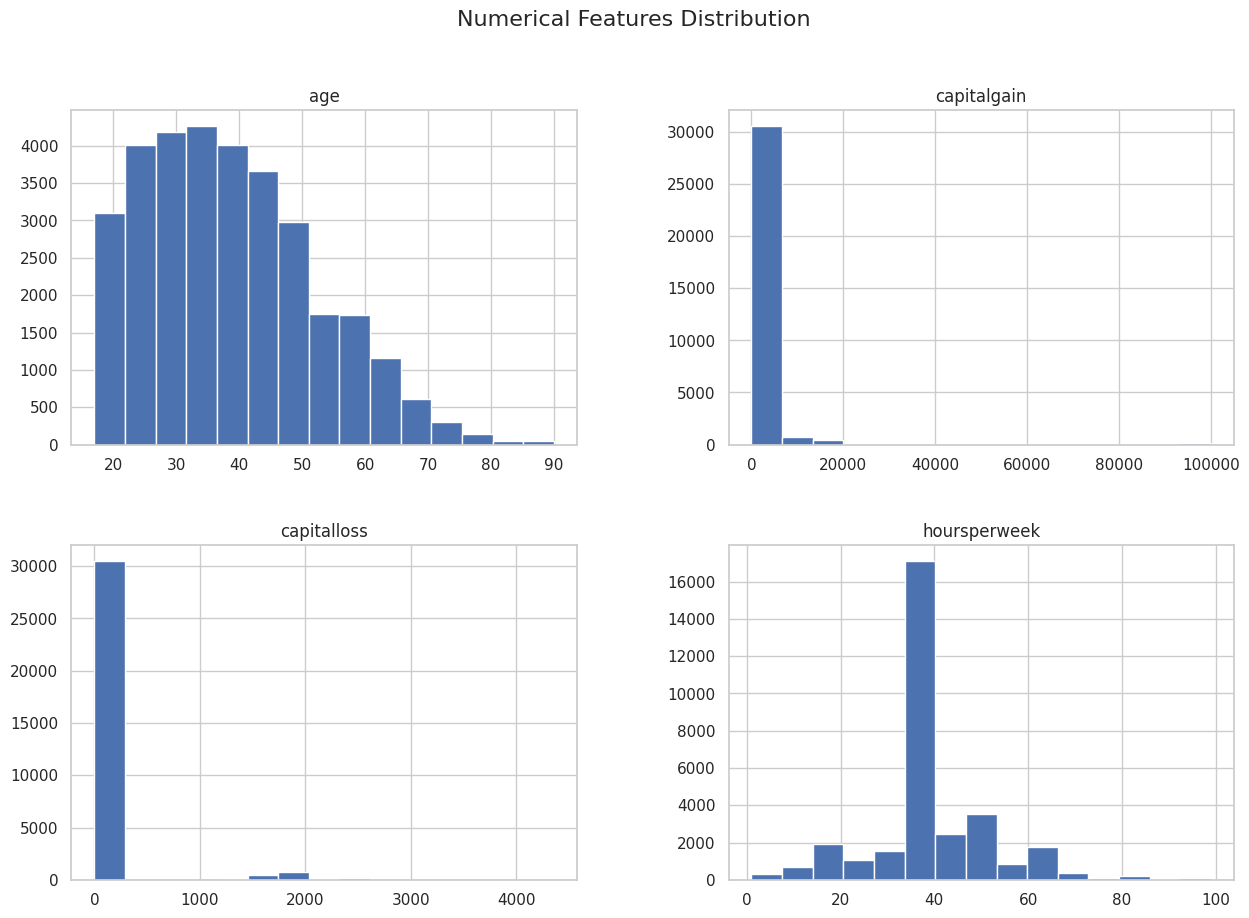

In [20]:

# Histograms
df[numerical_cols].hist(bins=15, figsize=(15,10), layout=(len(numerical_cols)//2, 2))
plt.suptitle("Numerical Features Distribution", fontsize=16)
plt.show()

Key Insights by Feature:

Age:
Right-skewed distribution with a clear peak in the 20–40 age range (highest frequencies around late 20s to mid-30s).
Frequency declines steadily after age 40, with a sharp drop beyond 60 and very few instances over 80.
Indicates the dataset primarily captures prime working-age adults, with fewer older individuals.

Capitalgain:
Highly skewed and zero-inflated: an overwhelming majority (~30,000+ instances) have 0 capital gain (massive bar at 0).
Non-zero values are rare and spread out in a long tail up to ~100,000.
Suggests capital gains are uncommon in this population.

Capitalloss:
Even more extremely zero-inflated than capital gain: nearly all instances (~30,000+) are at 0.
Very few non-zero values, limited to a small range up to ~4,000.
Capital losses are rare overall.

Hoursperweek:
Strong peak at exactly 40 hours (tallest bar, ~16,000 instances), typical of standard full-time employment.
Secondary clusters around 20–30 and 50+ hours; overall right-skewed with a tail toward overtime (up to 100 hours).
Some part-time workers (<30 hours), but full-time dominates.

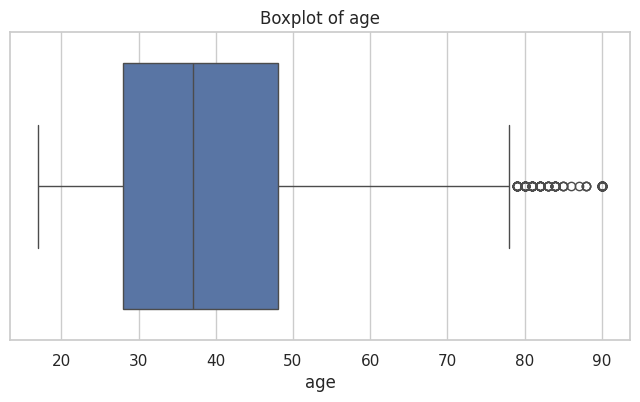

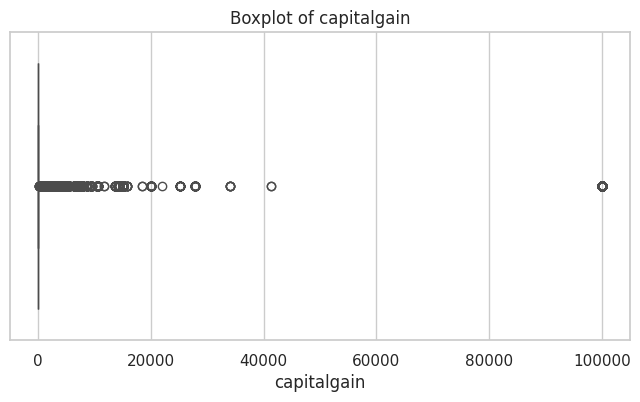

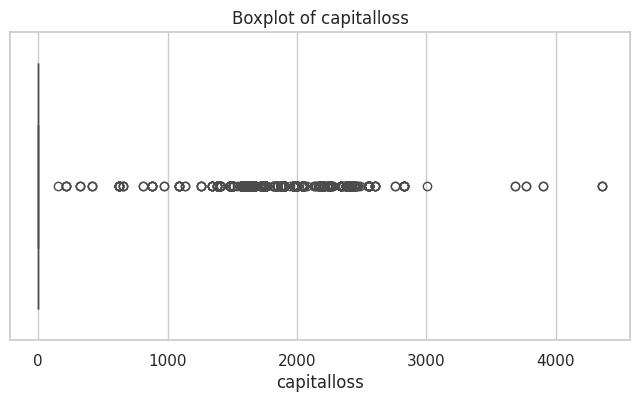

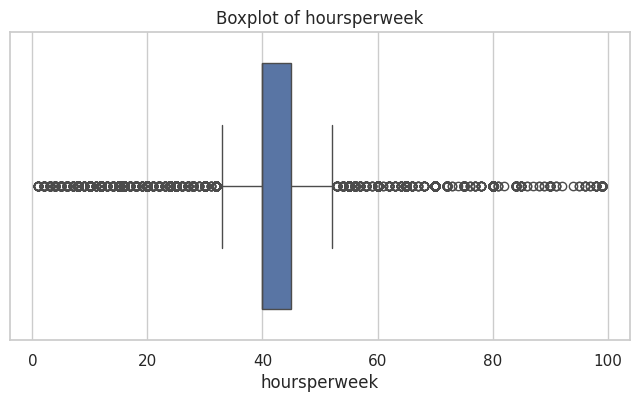

In [21]:
# Boxplots
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Key Observations:

Extreme zero-inflation and sparsity:
The vast majority of data points are exactly 0 (visible as the dense cluster of overlapping circles on the left at 0). This aligns with the previous histogram, where nearly all ~30,000+ instances had zero capital loss.
Box and whiskers are essentially collapsed:
The "box" (representing the interquartile range: Q1 to Q3) is a thin horizontal line very close to 0.
This indicates that at least 75% of the data (from the minimum to the 75th percentile) is 0 or extremely close to 0.
The median (50th percentile) is also 0.

Outliers:
All non-zero values are treated as outliers (shown as individual circles).
These outliers are sparsely distributed, mostly between roughly 1500 and 2500.
A few extend further, up to around 4300–4400 (matching the histogram's maximum).
There are no values between 0 and ~1500 (a gap after the zero cluster), which is why even moderate losses are flagged as outliers.


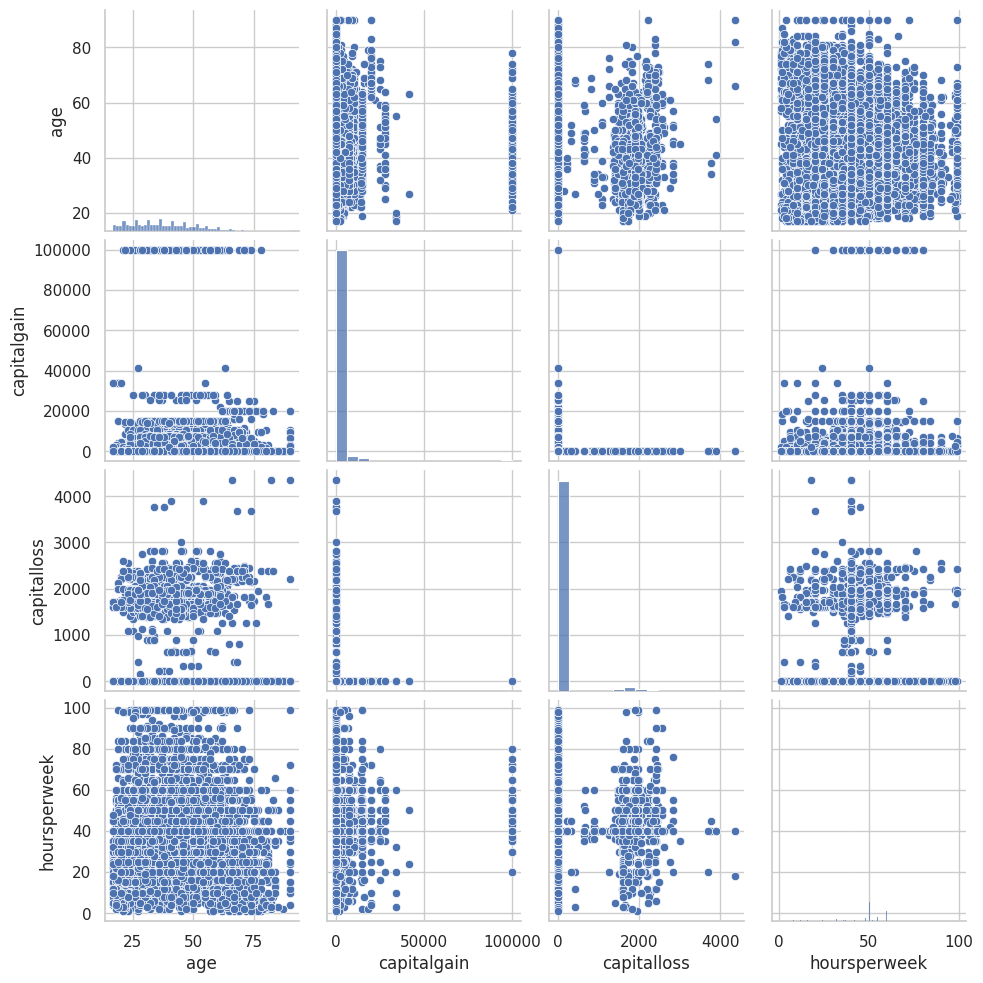

In [22]:
# Explore relationships between features
# Pairplot for numerical features
sns.pairplot(df[numerical_cols])
plt.show()

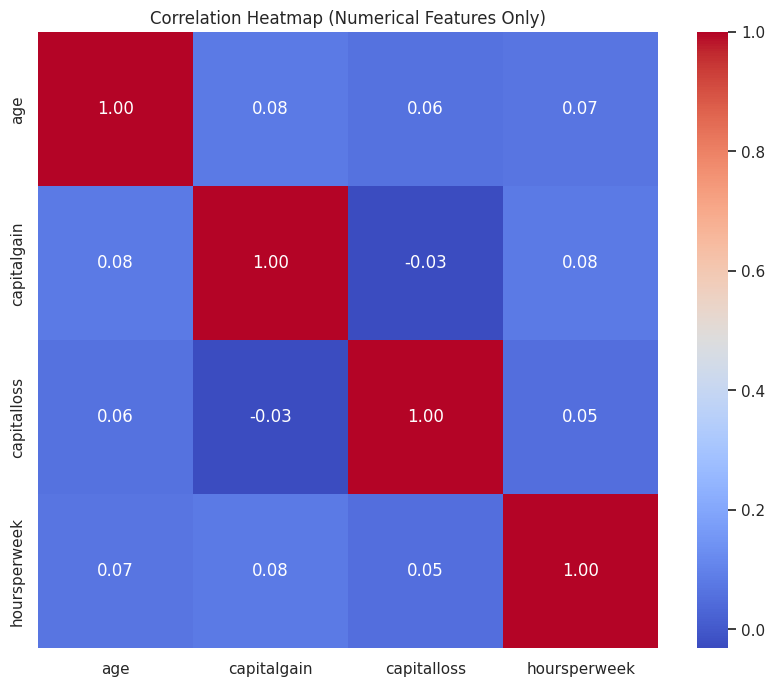

In [27]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


**Check the correlations for strong relationships**

Insights from the Correlation Heatmap (Numerical Features Only)
This heatmap shows the Pearson correlation coefficients between the four numerical features: age, capitalgain, capitalloss, and hoursperweek. Values range from -1 to +1, with red indicating positive correlation, blue negative, and darker colors representing stronger absolute correlations.
Summary of All Correlations

Diagonal values are always 1.00 (perfect self-correlation).
All off-diagonal correlations are very weak (|r| ≤ 0.08).
PairCorrelationStrength & Directionage & hoursperweek0.07Very weak positiveage & capitalgain0.08Very weak positiveage & capitalloss0.06Very weak positivecapitalgain & hoursperweek0.08Very weak positivecapitalloss & hoursperweek0.05Very weak positivecapitalgain & capitalloss-0.03Very weak negative
Key Conclusions on Strong Relationships

There are no strong correlations in this dataset among the numerical features.
The strongest observed relationship is only 0.08 (between age & capitalgain and between capitalgain & hoursperweek), which is negligible in practical terms.
Typical thresholds for considering correlations:
|r| > 0.3 → moderate
|r| > 0.5 → strong

All values here are far below even a moderate threshold.

Implications:
These numerical features are essentially linearly independent of each other.
No risk of multicollinearity if using these features together in linear models (e.g., logistic regression for income prediction).
The very weak positive links make intuitive sense:
Older people slightly more likely to have capital gains or work longer hours.
People working more hours slightly more likely to report capital gains.

The tiny negative correlation between capitalgain and capitalloss (-0.03) is practically zero.

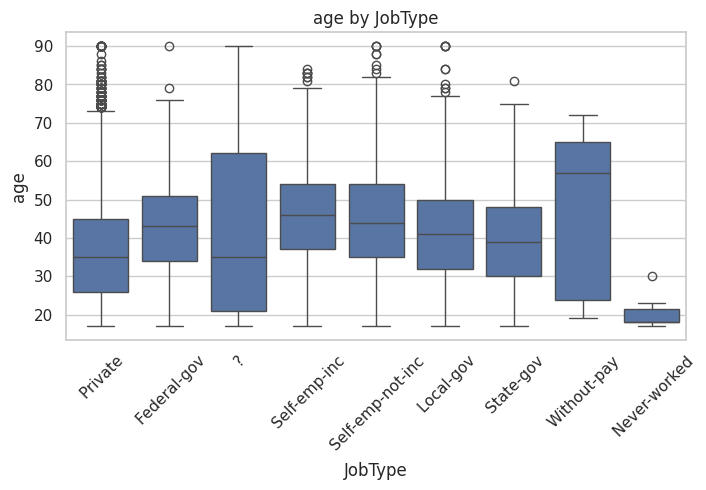

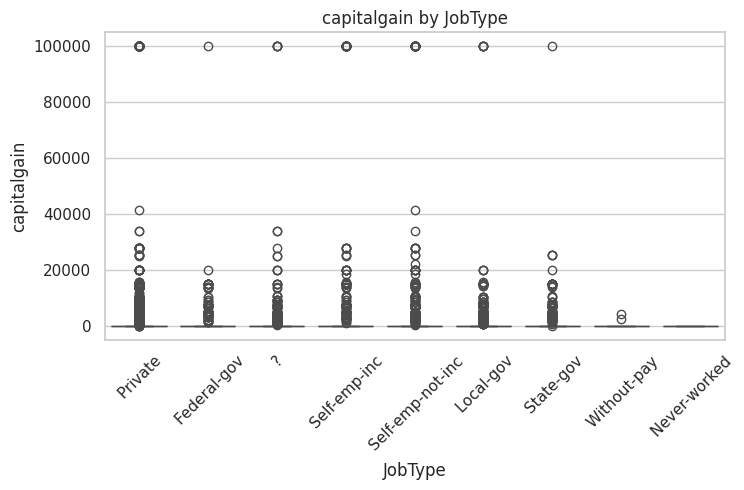

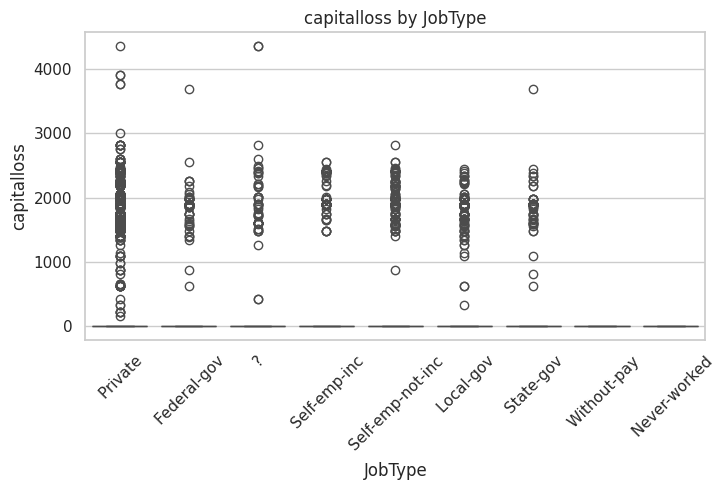

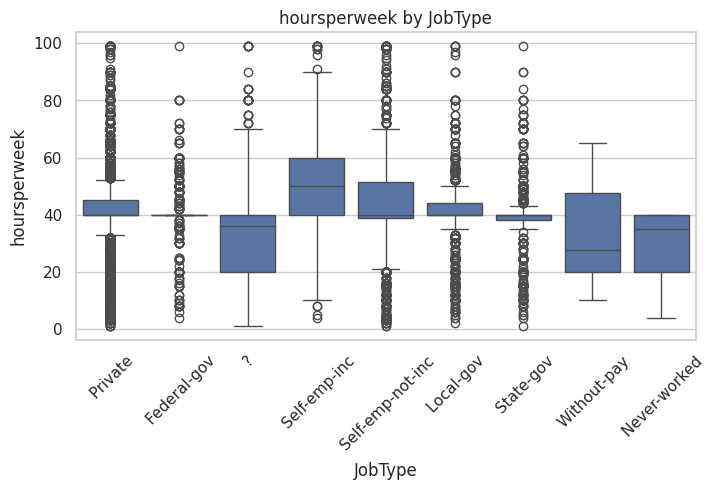

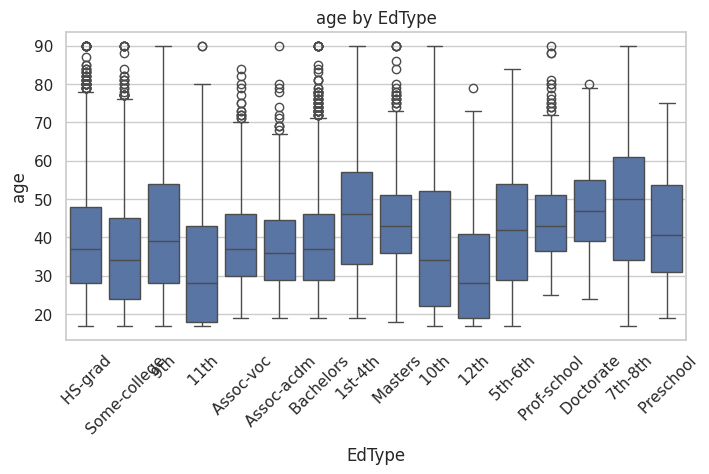

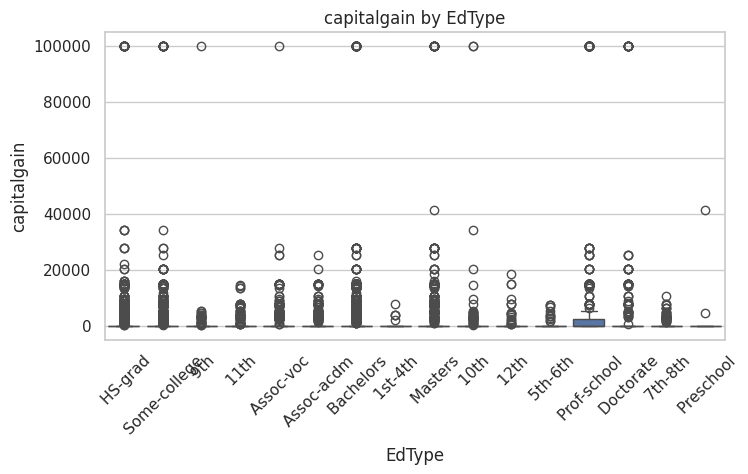

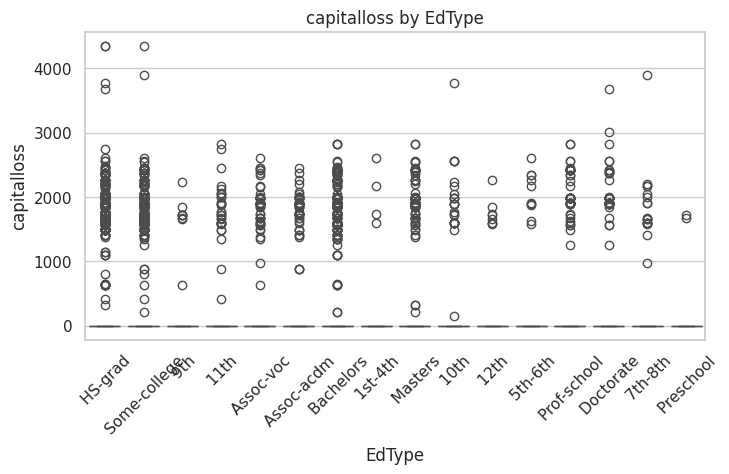

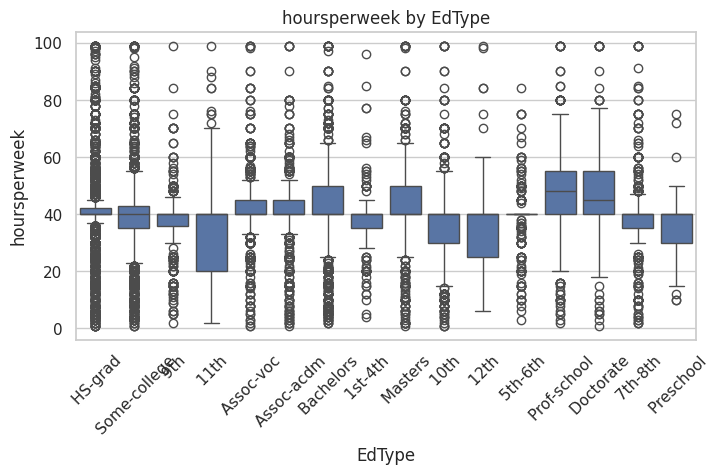

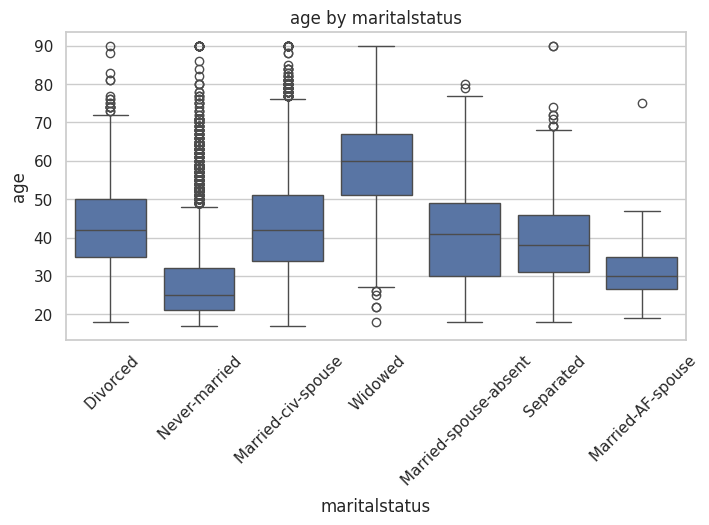

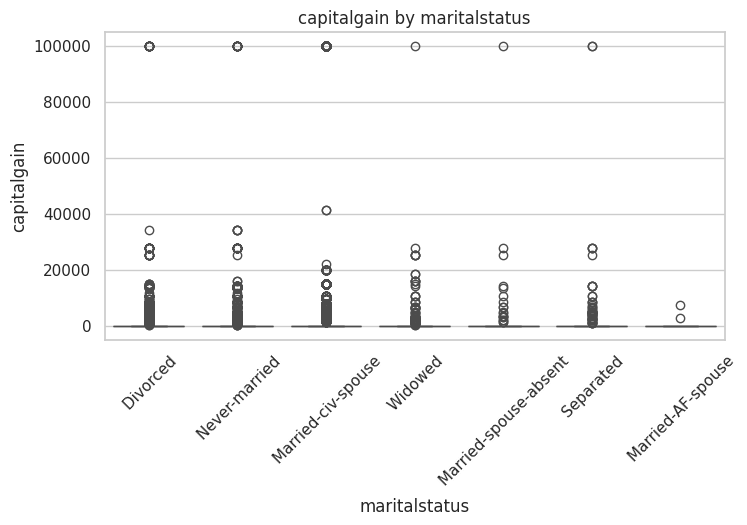

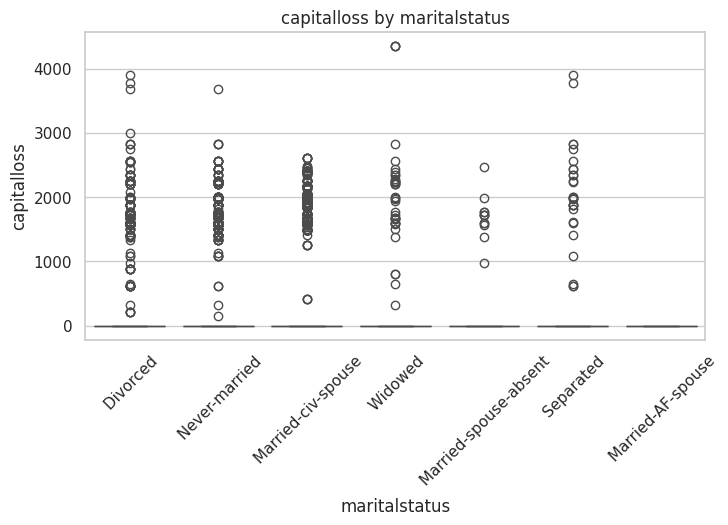

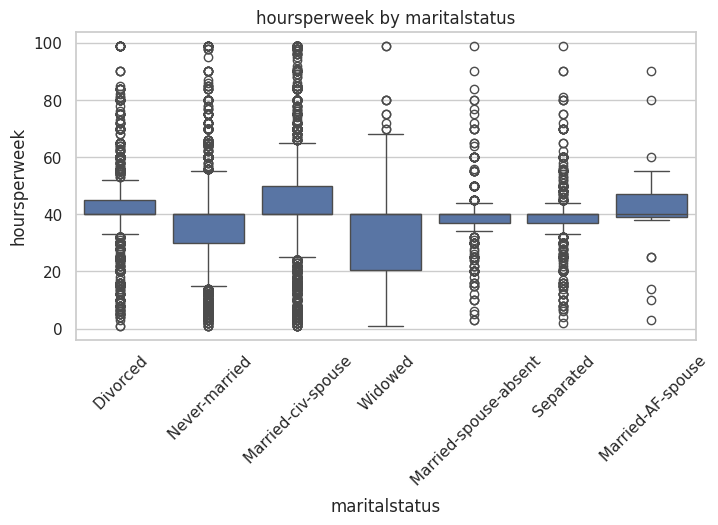

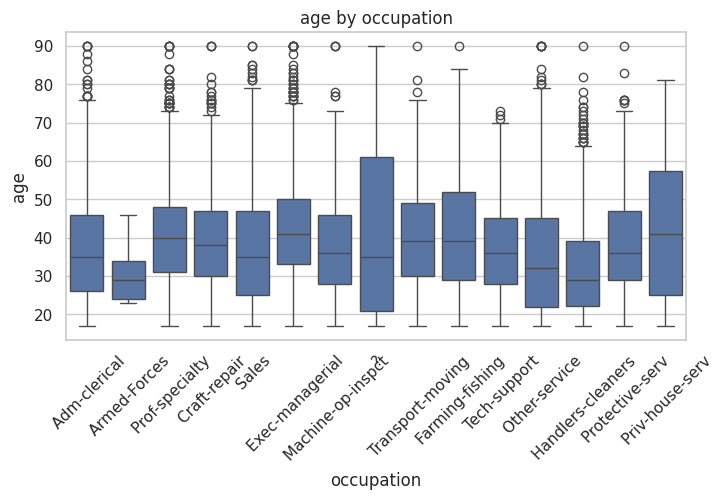

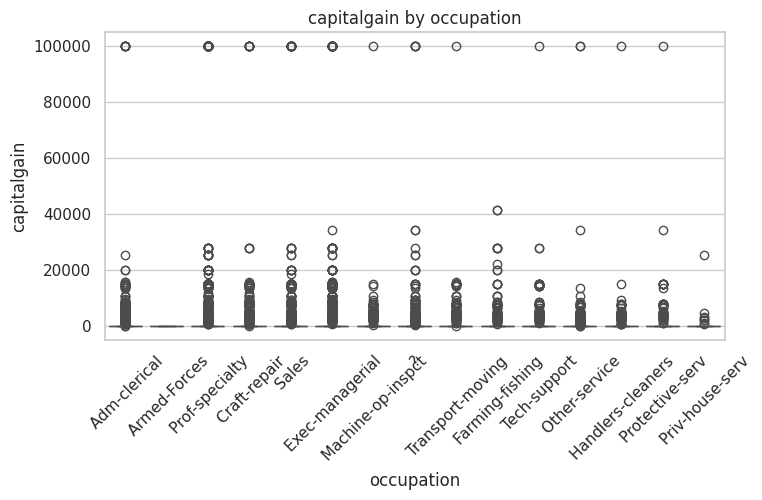

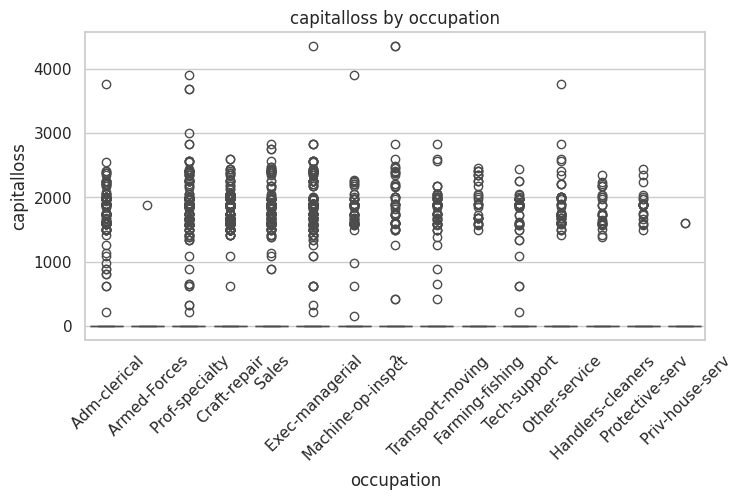

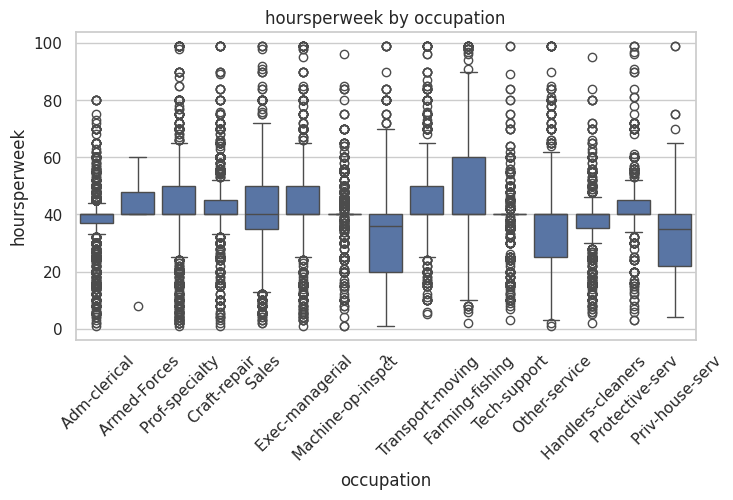

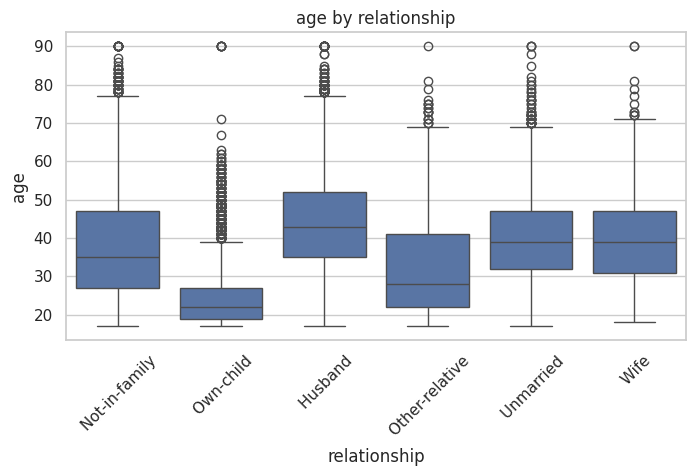

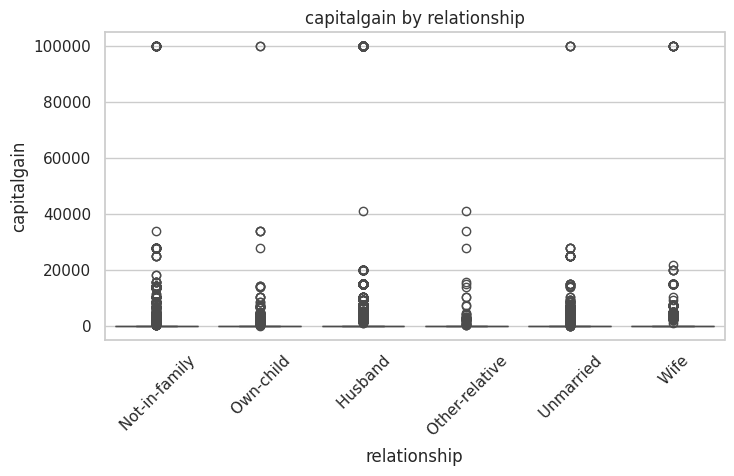

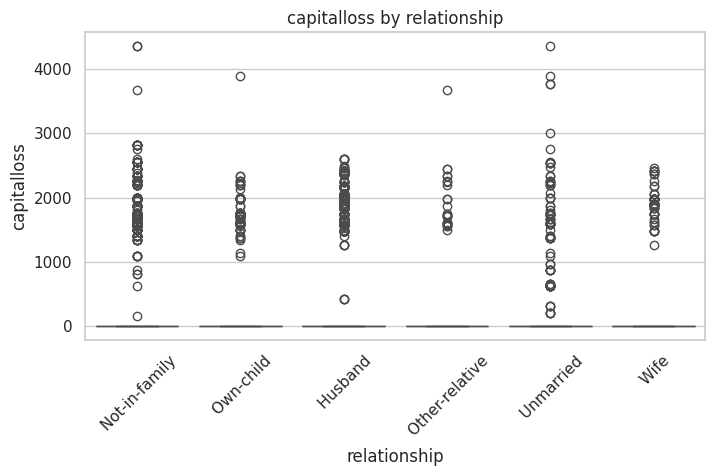

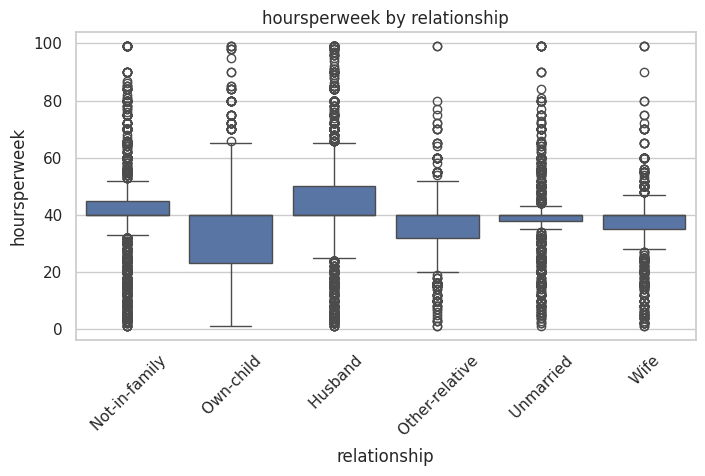

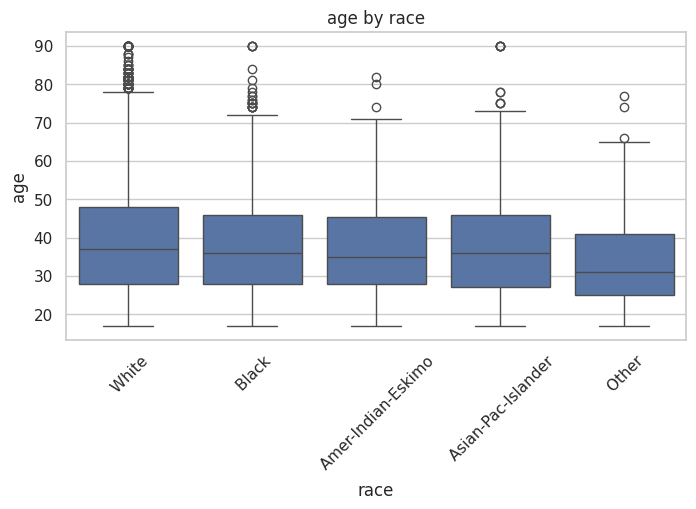

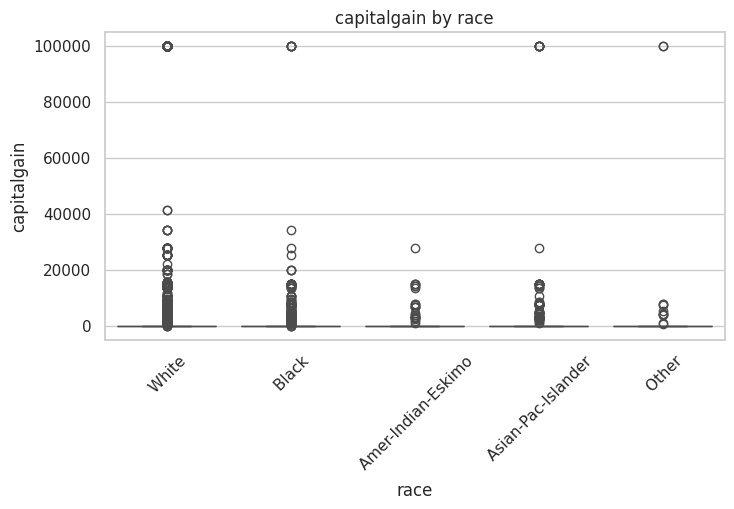

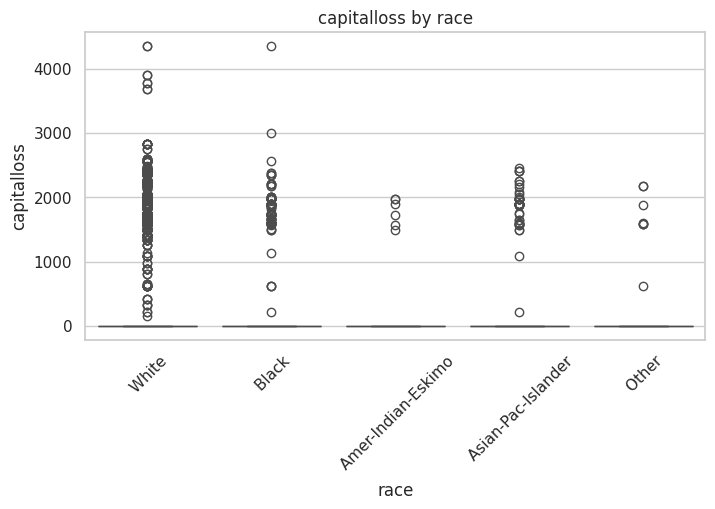

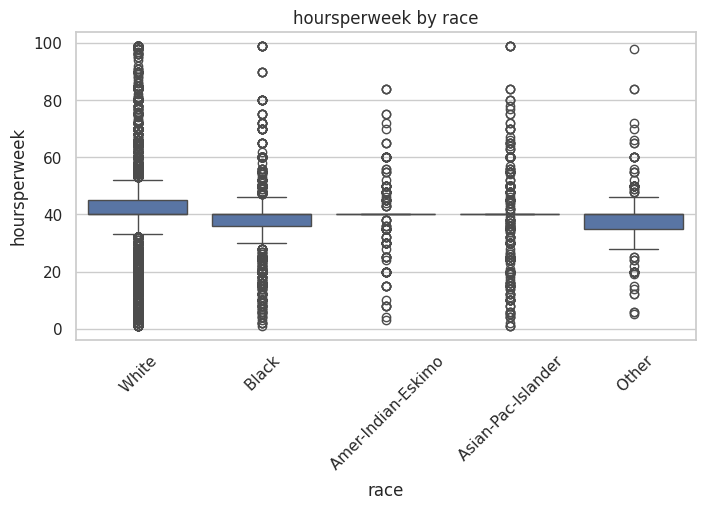

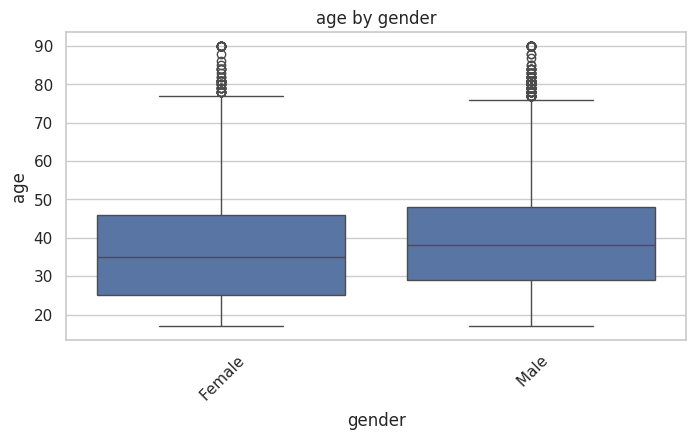

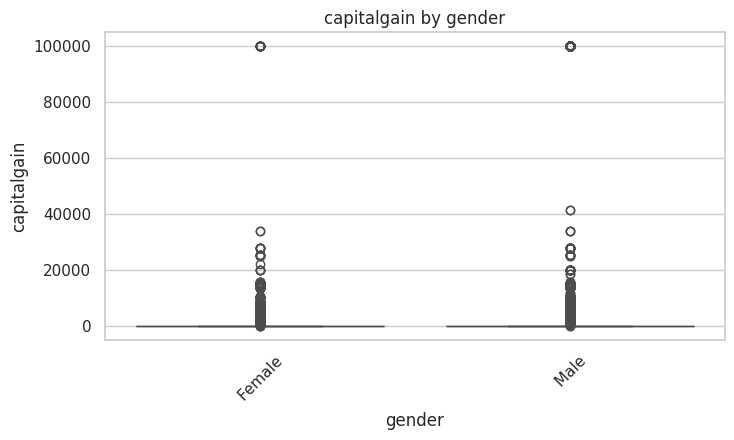

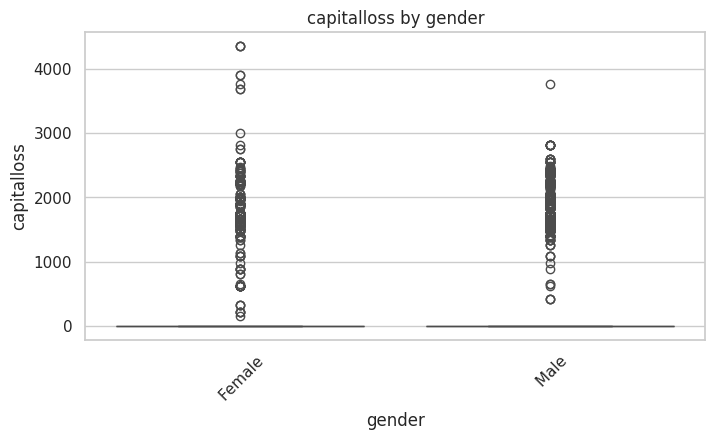

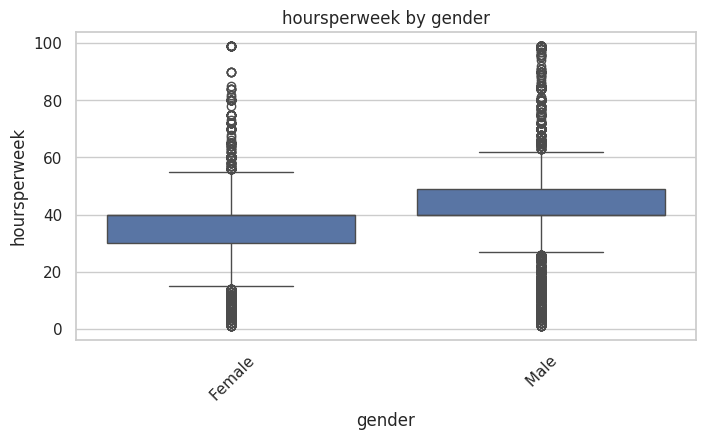

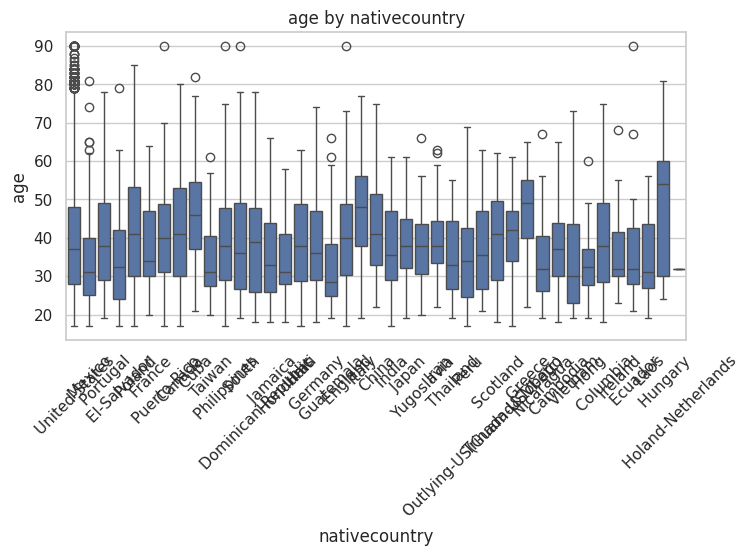

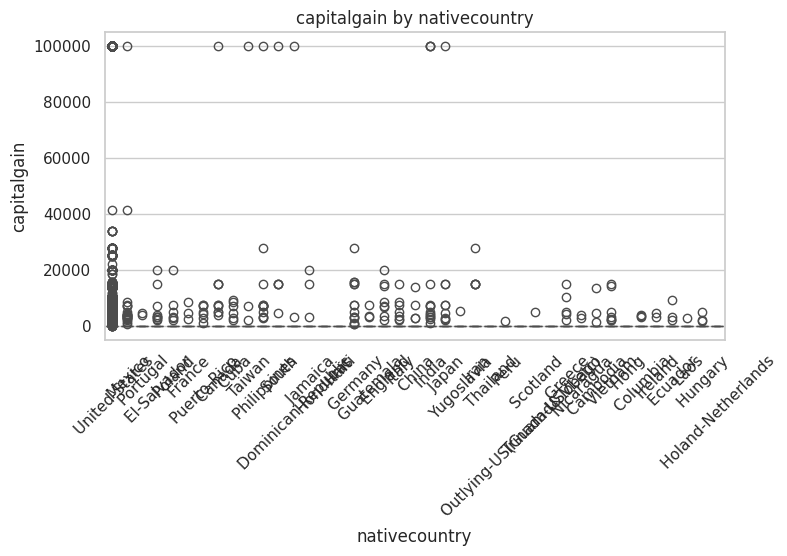

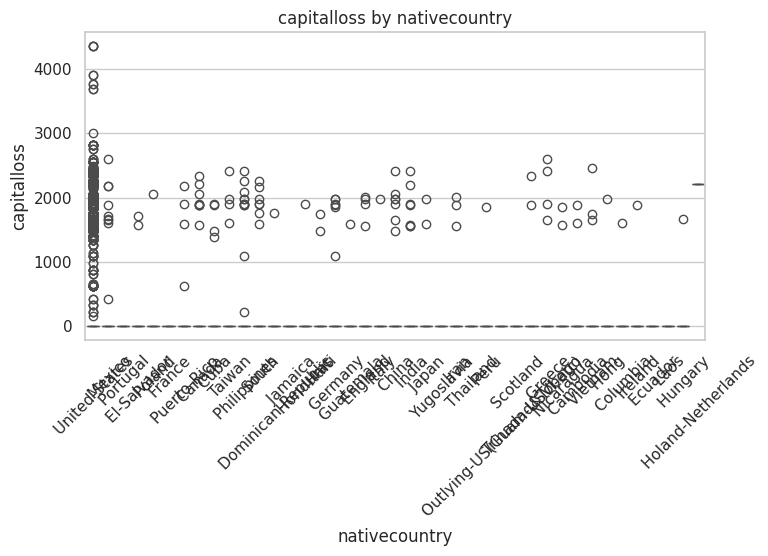

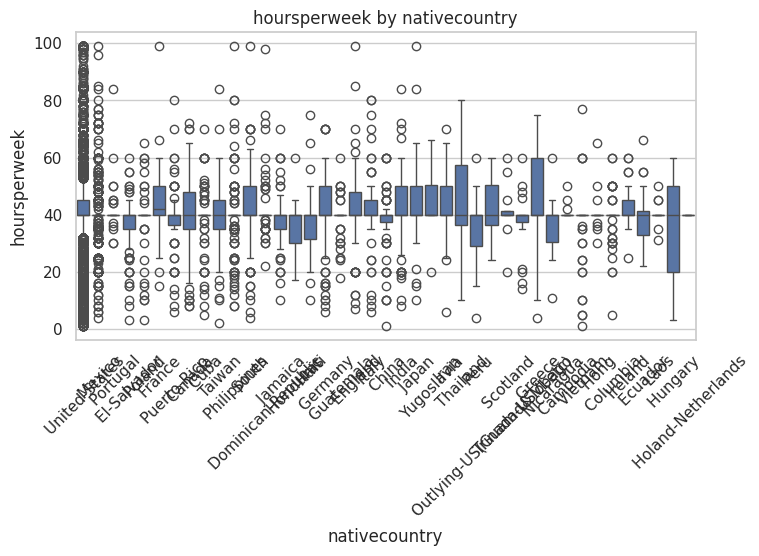

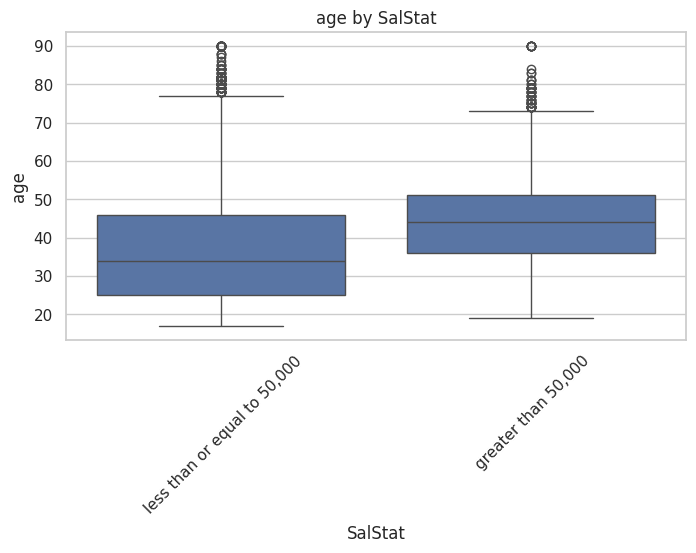

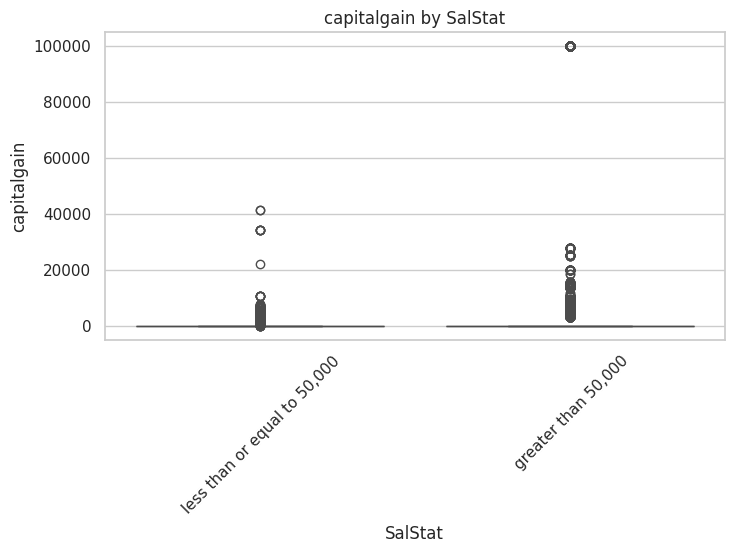

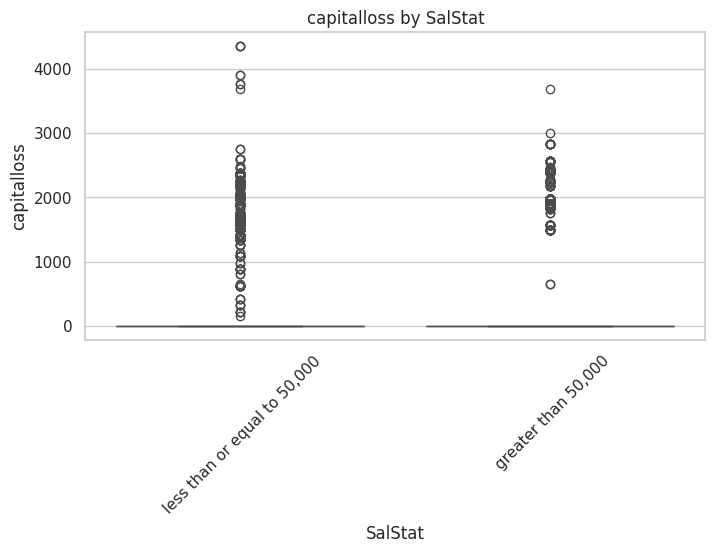

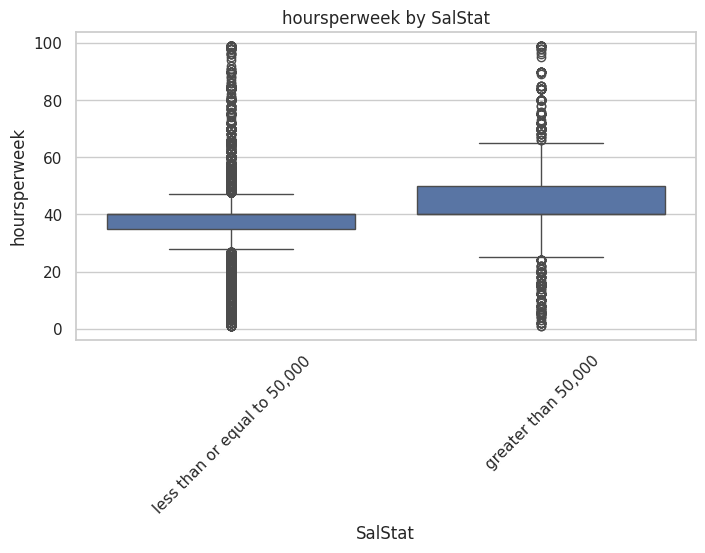

In [28]:
# Explore relationships between categorical and numerical variables
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f"{num_col} by {cat_col}")
        plt.xticks(rotation=45)
        plt.show()

In [29]:
# 8. Identify outliers (simple approach using IQR)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} - Number of outliers: {len(outliers)}")

age - Number of outliers: 140
capitalgain - Number of outliers: 2658
capitalloss - Number of outliers: 1483
hoursperweek - Number of outliers: 8850


### Look for outliers that may need attention
### Outliers Analysis and Which Features Need Attention

Outliers here were likely detected using the standard IQR method:  
- Lower bound: Q1 - 1.5 × IQR  
- Upper bound: Q3 + 1.5 × IQR  
Any values outside these bounds are flagged as outliers.

Here’s a breakdown of the outlier counts in context with the earlier summary statistics and distributions:

| Feature        | Number of Outliers | Total Rows | % Outliers | Assessment & Recommendation |
|----------------|--------------------|------------|------------|-----------------------------|
| **hoursperweek** | 8,850             | 31,978    | ~27.7%    | **High – Needs attention** <br>Very high number of outliers. Many people work significantly more than 45 hours (overtime) or less than ~30 hours (part-time). These are common real-world work patterns, not data errors. However, 27% is too high to remove blindly. **Recommendation**: Do not remove; consider capping extreme values or binning (e.g., part-time/full-time/overtime), or use robust models. |
| **capitalgain** | 2,658             | 31,978    | ~8.3%     | **High – Needs careful attention** <br>All non-zero values are essentially outliers because Q1 = Q3 = 0 (75% of data is 0). Any positive capital gain (>0) exceeds the upper bound. These represent genuine rare events (investment gains, bonuses, etc.). **Recommendation**: Do not remove. Best practice: create a binary feature "has_capitalgain" (1 if >0) and either keep the amount as-is, log-transform non-zero values, or use a separate model for amount. |
| **capitalloss** | 1,483             | 31,978    | ~4.6%     | **Moderate to High – Needs attention** <br>Similar to capitalgain: all non-zero values are outliers (Q1 = Q3 = 0). Fewer non-zero cases than capitalgain. **Recommendation**: Same as capitalgain — create binary "has_capitalloss" flag and handle non-zero amounts separately. |
| **age**         | 140               | 31,978    | ~0.44%    | **Low – Minimal attention needed** <br>Very small proportion. Likely corresponds to older individuals (above ~70–75 years, depending on exact IQR). These are plausible in a census dataset (retirees, elderly workers). **Recommendation**: Safe to either keep as-is or investigate/remove only the most extreme (e.g., >90) if domain knowledge suggests errors. Generally not a major concern. |

### Overall Recommendations
- **Features that most need attention for outliers**:  
  1. **hoursperweek** (highest % outliers, but legitimate variation)  
  2. **capitalgain** and **capitalloss** (outliers = all non-zero values due to zero-inflation)

- **Avoid mass removal** of outliers in any feature — especially in hoursperweek, capitalgain, and capitalloss — as they represent real, meaningful variations rather than errors.

- **Preferred strategies**:
  - Feature engineering (binary flags for capital features, binning for hoursperweek).
  - Use tree-based models (Random Forest, XGBoost) which are naturally robust to outliers.
  - Robust scaling (e.g., RobustScaler) instead of StandardScaler if using linear models.

Age outliers are negligible and can usually be left untouched.